In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from scipy.ndimage import label as ndi_label

In [4]:
labels = np.load("output/object_prediction.npy")

In [5]:
def analyze_instance_segmentation(labels):
    labels = labels.astype(int)

    object_ids = np.unique(labels)
    object_ids = object_ids[object_ids != 0]
    n_objects_labeled = len(object_ids)

    binary = labels > 0
    cc, n_objects_spatial = ndi_label(binary)

    n_objects_exploded = max(0, n_objects_labeled - n_objects_spatial)

    regions = measure.regionprops(labels)

    areas = []
    eccentricities = []
    solidities = []
    circularities = []
    perimeters = []

    exploded_labels = []

    for r in regions:
        areas.append(r.area)
        eccentricities.append(r.eccentricity)
        solidities.append(r.solidity)
        perimeters.append(r.perimeter)

        circ = 4 * np.pi * r.area / (r.perimeter**2 + 1e-8)
        circularities.append(circ)

        mask = labels == r.label
        _, n_cc = ndi_label(mask)
        if n_cc > 1:
            exploded_labels.append(r.label)

    areas = np.array(areas)
    eccentricities = np.array(eccentricities)
    solidities = np.array(solidities)
    circularities = np.array(circularities)

    metrics = {
        "n_objects_labeled": n_objects_labeled,
        "n_objects_spatial": n_objects_spatial,
        "n_objects_exploded": n_objects_exploded,
        "mean_area": areas.mean(),
        "median_area": np.median(areas),
        "area_std": areas.std(),
        "mean_circularity": circularities.mean(),
        "mean_solidity": solidities.mean(),
        "mean_eccentricity": eccentricities.mean(),
    }

    plt.figure(figsize=(16, 4))

    # Area
    plt.subplot(1, 4, 1)
    plt.hist(areas, bins=30)
    plt.title("Area Distribution")
    plt.xlabel("Pixels")
    plt.ylabel("Number of objects")
    
    # Circularity
    plt.subplot(1, 4, 2)
    plt.hist(circularities, bins=30, range=(0,1))
    plt.title("Circularity Distribution")
    plt.xlabel("Circularity")
    
    # Solidity
    plt.subplot(1, 4, 3)
    plt.hist(solidities, bins=30, range=(0,1))
    plt.title("Solidity Distribution")
    plt.xlabel("Solidity")
    
    # Eccentricity
    plt.subplot(1, 4, 4)
    plt.hist(eccentricities, bins=30, range=(0,1))
    plt.title("Eccentricity Distribution")
    plt.xlabel("Eccentricity")
    
    plt.tight_layout()
    plt.savefig("stats.png", dpi=100, transparent=True, bbox_inches="tight")
    plt.show()

    return metrics


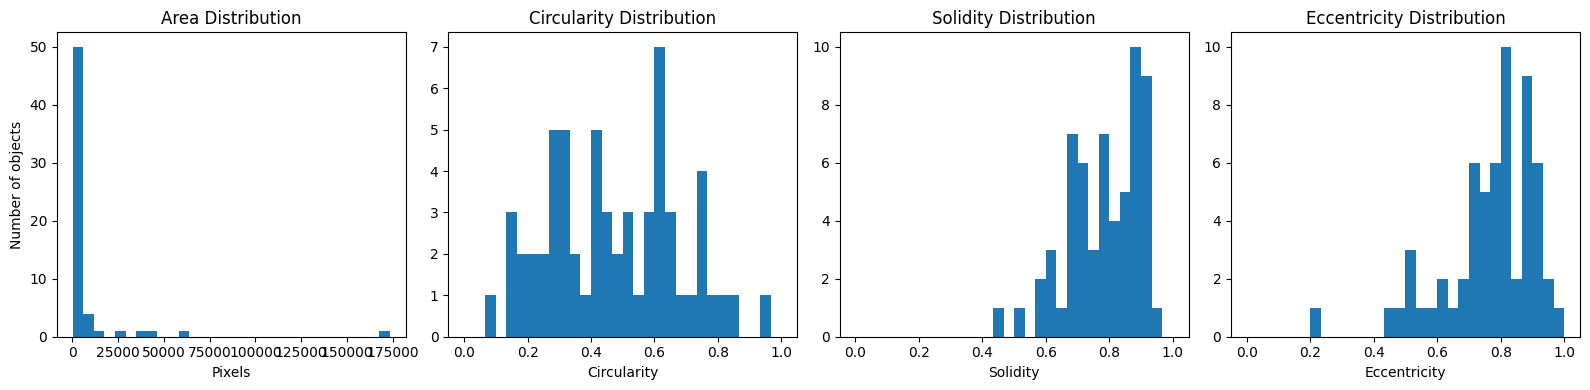

n_objects_labeled: 60
n_objects_spatial: 53
n_objects_exploded: 7
mean_area: 7668.033333333334
median_area: 1088.5
area_std: 24155.271886944727
mean_circularity: 0.46888924676680394
mean_solidity: 0.7839772657102757
mean_eccentricity: 0.7649161973201586


In [6]:
metrics = analyze_instance_segmentation(labels)

for k, v in metrics.items():
    print(f"{k}: {v}")
